In [1]:
%%capture
%run ProjectWebScraping.ipynb

In [2]:
from gensim.corpora.dictionary import Dictionary

article_doc = ['intro', 'machine', 'learning', 'spammy', 'email', 'python', 'scikit', 'learn', 'machine', 'learning']
article_doc = lemmatized_tokens_rep_platform_1980
doc_dict = Dictionary([article_doc])
for token, token_id in list(doc_dict.token2id.items())[:10]:
    print('{} => {}'.format(token, token_id))

... => 0
abandon => 1
abandoned => 2
abdicate => 3
abhor => 4
ability => 5
abject => 6
able => 7
able-bodied => 8
abm => 9


In [3]:
article_bow = doc_dict.doc2bow(article_doc)

# print the first 10 vocabulary tokens and their frequency within the article
for token_id, token_cnt in article_bow[:10]:
    print("{} = {}".format(doc_dict[token_id], token_cnt))

... = 2
abandon = 1
abandoned = 1
abdicate = 1
abhor = 1
ability = 24
abject = 1
able = 4
able-bodied = 1
abm = 1


In [1]:
import matplotlib.pyplot as plt
most_frequent = sorted(article_bow, key=lambda x: x[1], reverse=True)

term_ids, counts = zip(*most_frequent)

top_terms = [doc_dict[id] for id in term_ids[:5]]
top_term_counts = counts[:5]

fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(top_terms, top_term_counts)
plt.gca().invert_yaxis()
ax.set_xlabel('frequency')
ax.set_ylabel('terms')
ax.set_title('Most Frequently Used Words')
plt.show()

NameError: name 'article_bow' is not defined

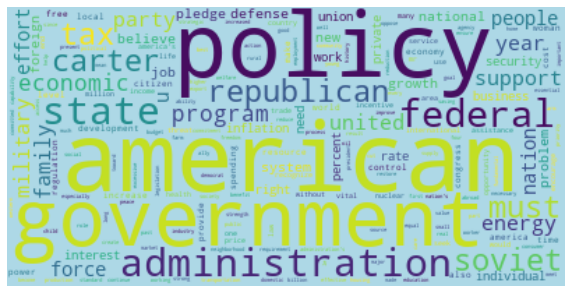

In [5]:
%matplotlib inline
from wordcloud import WordCloud

most_frequent = sorted(article_bow, key=lambda x: x[1], reverse=True)
frequencies = {doc_dict[id]: cnt for id, cnt in most_frequent}

wordcloud = WordCloud(background_color="lightblue").fit_words(frequencies)

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
from gensim.models.ldamodel import LdaModel

n_topics = 1

# train an unsupervised model of k topics
lda = LdaModel([article_bow], num_topics=n_topics, random_state=23, id2word=doc_dict)

In [7]:
topics = lda.show_topics(num_topics=n_topics, num_words=5, formatted=False)
topics = sorted(topics, key=lambda x: int(x[0]))
print("Num topics {}".format(len(topics)))
topics

Num topics 1


[(0,
  [('american', 0.008105615),
   ('policy', 0.007174751),
   ('government', 0.005900664),
   ('administration', 0.0058565154),
   ('state', 0.005729763)])]

In [8]:
import os, ssl
import re

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
from nltk.stem import WordNetLemmatizer

In [9]:
from typing import Optional
from urllib import request
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def fetch_article(url : str) -> str:
    response = request.urlopen(url).read().decode('utf8')

    soup = BeautifulSoup(response, 'html.parser')
    
    # select the main content div containing the article text
    article = soup.find('div', class_='card-body-big')

    full_text = article.get_text()
    
    return full_text
    

def tokenize_article(article : str, extra_stops : Optional[list] = None) -> list[str]:
    # common stop words in the English language
    en_stopwords = stopwords.words('english')

    if extra_stops:
        en_stopwords += extra_stops

    # stop words collection as a fast searchable set
    article_stopwords = set(en_stopwords)

    lmr = WordNetLemmatizer()

    # tokenize the text
    article_tokens = []
    for t in word_tokenize(article):
        if t.isalpha():
            t = lmr.lemmatize(t.lower())
            if t not in article_stopwords:
                article_tokens.append(t)
                
    return article_tokens

In [10]:
import time

urls = [
    'https://thecodinginterface.com/blog/spam-ham-ml-scikit-learn/',
    'https://thecodinginterface.com/blog/opencv-Mat-from-array-and-vector/',
    'https://thecodinginterface.com/blog/sql-window-functions/',
    'https://thecodinginterface.com/blog/bridging-nodejs-and-python-with-pynode/',
    'https://thecodinginterface.com/blog/django-auth-part1/',
    'https://thecodinginterface.com/blog/django-auth-part4/',
    'https://thecodinginterface.com/blog/intro-to-java-for-devs/',
    'https://thecodinginterface.com/blog/text-analytics-app-with-flask-and-textblob/',
    'https://thecodinginterface.com/blog/aws-s3-python-boto3/',
    'https://thecodinginterface.com/blog/intro-to-pyspark/',
    'https://thecodinginterface.com/blog/java-web-scraping-app-with-jsoup-and-javafx/',
    'https://thecodinginterface.com/blog/javafx-alerts-and-dialogs/',
    'https://thecodinginterface.com/blog/intro-to-pyflink/',
    'https://thecodinginterface.com/blog/opencv-cpp-vscode/'
]

docs = []
for url in urls:
    article_txt = fetch_article(url)
    time.sleep(1) # server nap
    article_tokens = tokenize_article(article_txt, extra_stops=['print', 'date', 'div', 'adam', 'mcquistan'])
    docs.append(article_tokens)
    
corpus_dict = Dictionary(docs)

In [11]:
corpus_dict.filter_extremes(no_below=1, no_above=0.5)

In [12]:
corpus = [corpus_dict.doc2bow(doc) for doc in docs]